In [4]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import math
from functools import reduce
%matplotlib inline
np.random.seed(42)

In [7]:
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

In [8]:
X_train, Y_train, X_test, Y_test = load()

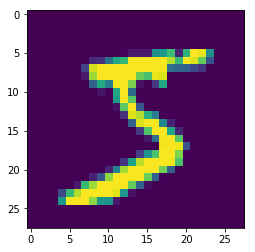

In [9]:
plt.imshow(X_train[0].reshape(28,28))

In [10]:
class FC:
    def __init__(self, in_channel, out_channel):
        self.W = {'val': np.random.standard_normal((in_channel,out_channel)), 'grad': 0}
        self.b = {'val': np.random.randn(out_channel), 'grad': 0}
        self.cache = None
    
    def forward(self, X):
        out = np.dot(X, self.W) + self.b
        self.cache = X
        return out
    
    def backward(self, dout):
        X = self.cache
        dX = np.dot(dout, self.W['val'].T).reshape(X.shape)
        self.W['grad'] = np.dot(X.reshape(X.shape[0], np.prod(X.shape[1:])).T, dout)
        self.b['grad'] = np.sum(dout, axis=0)
        self.update()
        return dX
    
    def update(self, lr=0.001):
        self.W['val'] -= lr*self.W['grad']
        self.b['val'] -= lr*self.b['grad']

In [ ]:
class Conv2d:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.eta = NULL
        
        self.W = {'val': np.random.standard_normal((kernel_shape,kernel_shape,in_channels,out_channels)), 'grad': 0}
        self.b = {'val': np.random.standard_normal(out_channels), 'grad': 0}
        
    def forward(self, x):
        (N,Cin,H,W) = x.shape
        col_weights = self.W['val'].reshape([-1,self.out_channels])
        self.col_image = []
        for i in range(N):
            img_i = x[i][np.newaxis,:]
            self.col_image_i = im2col(img_i,self.kernel_shape,self.stride)
            
    def im2col(image, ksize, stride):
        # image is a 4d tensor([batchsize, channel, height, width])
        image_col = []
        for i in range(0, image.shape[2] - ksize + 1, stride):
            for j in range(0, image.shape[3] - ksize + 1, stride):
                col = image[:, :,i:i + ksize, j:j + ksize].reshape([-1])
                image_col.append(col)
        image_col = np.array(image_col)
        return image_col

In [18]:
class MaxPool2d:
    pass

In [27]:
a = np.random.standard_normal((2,2,1,2))
print(a)
print(a.reshape(-1,2))

[[[[ 0.25442084  0.33760266]]

  [[-0.41187697 -0.48760622]]]


 [[[-0.43255819  0.39445214]]

  [[-0.42098448  0.28977486]]]]
[[ 0.25442084  0.33760266]
 [-0.41187697 -0.48760622]
 [-0.43255819  0.39445214]
 [-0.42098448  0.28977486]]


In [47]:
batch = X_train[0:2].reshape(2,28,28,1)
batch[0] * a

ValueError: operands could not be broadcast together with shapes (28,28,1) (2,2,1,2) 